# Introduction

This analysis aims to provide personalized movie recommendations to users on a streaming platform based on their movie preferences and rating history. In the highly competitive streaming industry, offering relevant and tailored content is essential to increasing user engagement and reducing churn. By leveraging the [MovieLens dataset](https://web.archive.org/web/20240828133414/https://grouplens.org/datasets/movielens/latest/) from the GroupLens research lab at the University of Minnesota, this project seeks to create a recommendation system that enhances the user experience and drives long-term engagement.

## Business Problem

A streaming service is looking to improve user satisfaction and engagement by offering personalized movie recommendations. Despite having a large library of content, many users are not engaging with the platform as expected, resulting in lower average watch times and higher churn rates. The company wants to develop a movie recommendation system that can provide users with a tailored list of movies based on their past ratings and viewing history, increasing the likelihood of engagement and retention.

### Objectives

**Main Objective:** Build a recommendation system that provides the top 5 movie recommendations to each user based on their ratings of other movies. The model will be built using collaborative filtering techniques and enhanced by a hybrid approach to mitigate the cold-start problem for new users.

**Increase User Engagement**: Offer personalized recommendations that match individual preferences, encouraging users to explore more content on the platform, leading to increased average watch time.

**Improve Retention**: By consistently offering relevant recommendations, the system will help reduce user churn and foster long-term platform loyalty.

**Personalize Content Discovery**: Enable users to discover content that aligns with their unique tastes, ensuring they feel more connected to the platform and its offerings.

**Cold-Start Problem Mitigation**: For new users who haven’t rated or interacted with many movies, implement a hybrid recommendation approach that combines collaborative filtering with content-based filtering to make relevant suggestions early in their platform experience

## Data Understanding

The [MovieLens Dataset](https://web.archive.org/web/20240828133414/https://grouplens.org/datasets/movielens/latest/), sourced from the GroupsLens research Lab at the University of Minnesota contains a colection of movie ratings and associated metadata.
For this project we'll use the smaller dataset which contains 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users.
THe data files with their features include:

1. Links.csv : contains movies unique identifiers. That is their movies ids, tmdbid, imdbid

2. Movies.csv : contains the following columns:

* movieId- unique identifier for a movie.
* Title- name of the movie with the year of release.
* Genres- movie category.

3. Ratings.csv : contains ratings for movies made by users.The dataset contains the following columns:

* UserId- unique identifier for a user.
* MovieId- unique identifier for a movie.
* Rating- rating given by a user for a movie.
* Timestamp- represrnts seconds since midnight Coordinated Universal Time of January 1, 1970.

4. Tags.csv : Each line of this file after the header row represents one tag applied to one movie by one user, and has the following columns:
* userId- unique anonymized Identifier for a user.
* movieId - unique identifier for a movie.
* tag- user-generated metadata about movies.
* timestamp-seconds since midnight Coordinated Universal Time of January 1, 1970.


* Movie ids are consistent between `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv` (i.e., the same id refers to the same movie across these four data files).

* User ids are consistent between `ratings.csv` and `tags.csv` (i.e., the same id refers to the same user across the two files).


   


In [47]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# read data
link = pd.read_csv('data/links.csv')
link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [49]:
# check for missing values
link.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [50]:
# check for duplicated values
link.duplicated().sum()

0

In [51]:
# Loading the movies data
movies = pd.read_csv('data/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [52]:
# check for missing values
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [53]:
# check for duplicated values
movies.duplicated().sum()

0

In [54]:
ratings = pd.read_csv('data/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [55]:
# check for missing values
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [56]:
# check for duplicated values
ratings.duplicated().sum()

0

In [57]:
tags = pd.read_csv('data/tags.csv')
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [58]:
# check for missing values
tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [59]:
# check for duplicated values
tags.duplicated().sum()

0

In [60]:
# Combine the datasets
movie_ratings = pd.merge(ratings, movies, on='movieId', how='left')
movie_ratings

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [61]:
movie_ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [62]:
movie_ratings.duplicated().sum()

0

In [63]:
merged_df = pd.merge(movie_ratings, tags, on='movieId', how='inner')
merged_df

,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
4,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,599,176419,3.5,1516604655,Mother! (2017),Drama|Horror|Mystery|Thriller,567,uncomfortable,1525287588
233209,599,176419,3.5,1516604655,Mother! (2017),Drama|Horror|Mystery|Thriller,567,unsettling,1525287586
233210,594,7023,4.5,1108972356,"Wedding Banquet, The (Xi yan) (1993)",Comedy|Drama|Romance,474,In Netflix queue,1137179697
233211,606,6107,4.0,1171324428,Night of the Shooting Stars (Notte di San Lore...,Drama|War,606,World War II,1178473747


In [64]:
merged_df.isna().sum()

userId_x       0
movieId        0
rating         0
timestamp_x    0
title          0
genres         0
userId_y       0
tag            0
timestamp_y    0
dtype: int64

In [65]:
# drop userId_y and timestamp_y 
merged_df = merged_df.drop(columns=['timestamp_y', 'userId_y', 'timestamp_x'])


In [66]:
# rename userId_x
merged_df = merged_df.rename(columns={'userId_x' : 'userId'})

In [67]:
merged_df.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
tag        0
dtype: int64

In [68]:
merged_df.duplicated().sum()

13807

In [69]:
merged_df.head()

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
4,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar


In [70]:
cleaned_df=merged_df.drop_duplicates()

In [71]:
cleaned_df.duplicated().sum()

0

In [72]:
cleaned_df.head()

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
5,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
6,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar


In [73]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219406 entries, 0 to 233212
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   219406 non-null  int64  
 1   movieId  219406 non-null  int64  
 2   rating   219406 non-null  float64
 3   title    219406 non-null  object 
 4   genres   219406 non-null  object 
 5   tag      219406 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 11.7+ MB


## Exploratory Data Analysis

### 1. Univariate Analysis

#### 1.1 Rating

In [74]:
# RATING
cleaned_df.rating.value_counts()

rating
4.0    60933
5.0    59645
4.5    29403
3.0    27246
3.5    21600
2.0     7567
2.5     6157
1.0     3553
0.5     1822
1.5     1480
Name: count, dtype: int64

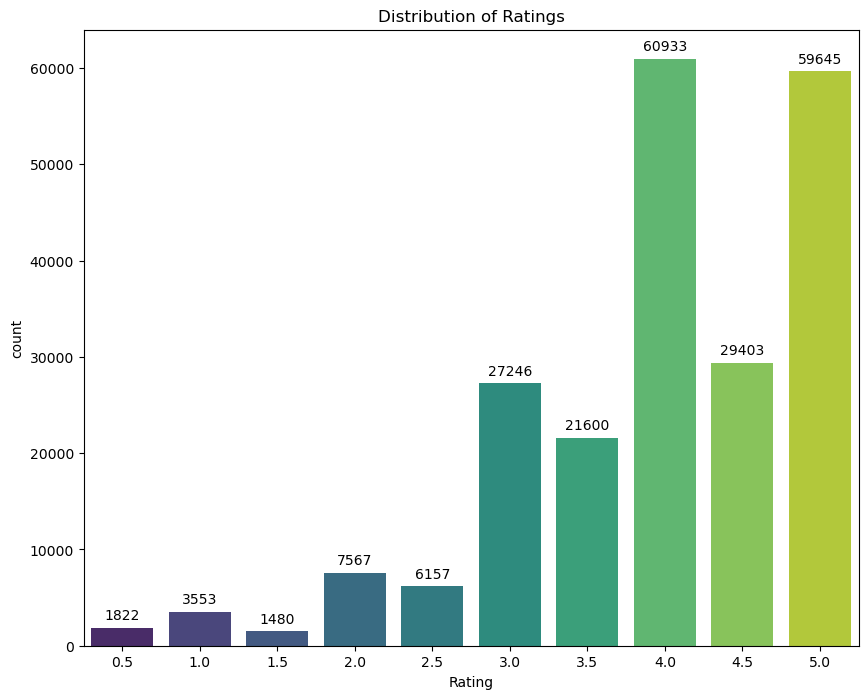

In [75]:
# bar chart 
fig, ax = plt.subplots(figsize=(10,8))

#x
x = cleaned_df.rating.value_counts().index
#y
y = cleaned_df.rating.value_counts().values


sns.barplot(x=x,y=y, ax=ax, palette='viridis')
ax.set_xlabel('Rating')
ax.set_ylabel('count')
ax.set_title('Distribution of Ratings');

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

* The ratings **4.0** and **5.0** are the  most frequent ratings with a counts of 60933 and 59645 respectively.

#### 1.2 Tags

In [76]:
cleaned_df['tag'].value_counts()

tag
sci-fi                        1891
atmospheric                   1888
twist ending                  1821
thought-provoking             1743
suspense                      1588
                              ... 
representation of children       1
Titanic                          1
Ninotchka remake                 1
Tokyo                            1
big wave                         1
Name: count, Length: 1584, dtype: int64

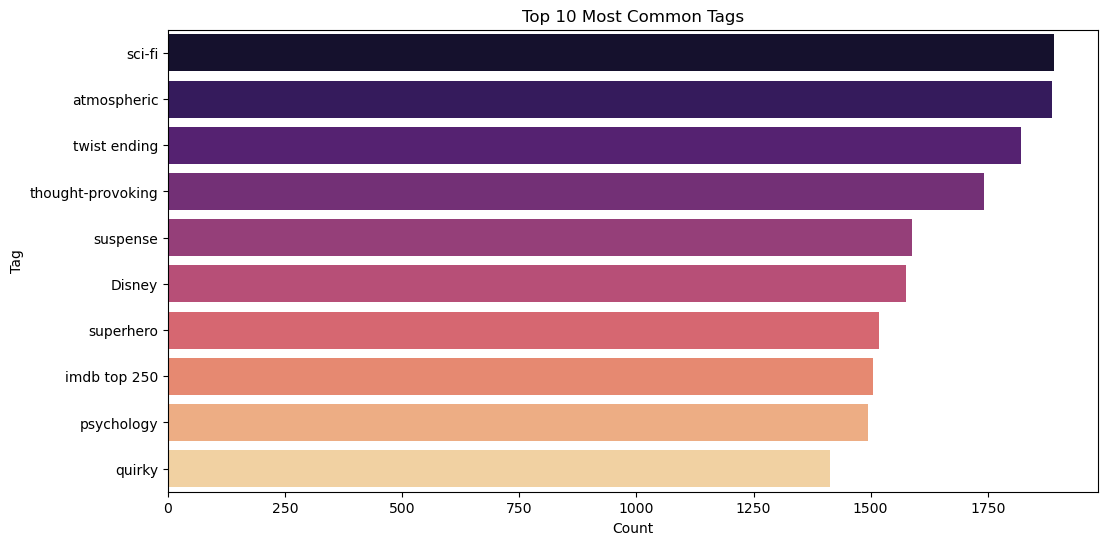

In [77]:
# Number of occurrences for each tag
tag_counts = cleaned_df['tag'].value_counts()

# Plot the top 10 most common tags
top_10_tags = tag_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_tags.values, y=top_10_tags.index, palette='magma')
plt.title("Top 10 Most Common Tags")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()


**Sci-fi**, **atmospheric** and **twist ending** are the most common movie tags

#### 1.3 Genres

In [78]:
cleaned_df['genres'].value_counts()

genres
Comedy|Crime|Drama|Thriller                   54395
Action|Crime|Drama|Thriller                   15018
Action|Adventure|Sci-Fi                        9785
Drama                                          6159
Comedy                                         5212
                                              ...  
Drama|Thriller|Western                            1
Adventure|Comedy|Crime|Drama|Romance              1
Comedy|Crime|Drama|Musical|Mystery|Romance        1
Comedy|Crime|Drama|Mystery|Romance                1
Animation|Drama|Romance|Sci-Fi                    1
Name: count, Length: 370, dtype: int64

In [79]:
cleaned_df.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
tag        0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_10444\685299857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['genres_list']=cleaned_df['genres'].str.split('|')


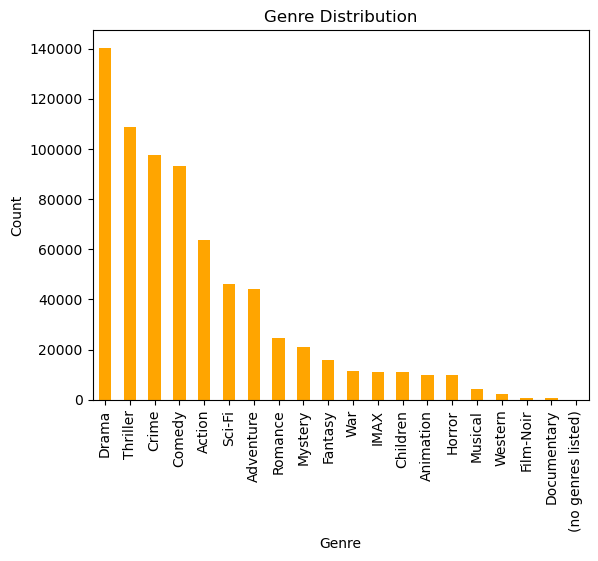

In [80]:
cleaned_df['genres_list']=cleaned_df['genres'].str.split('|')

genre_counts= cleaned_df['genres_list'].explode().value_counts()

genre_counts.plot(kind='bar',color='orange')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()

**Drama**,**Thriller** and **Crime** are the top 3 Genres.

### 2. Bivariate Analysis

#### 2.1 User id vs Rating

In [81]:
user_ratings = cleaned_df[['userId', 'title','rating']].drop_duplicates()

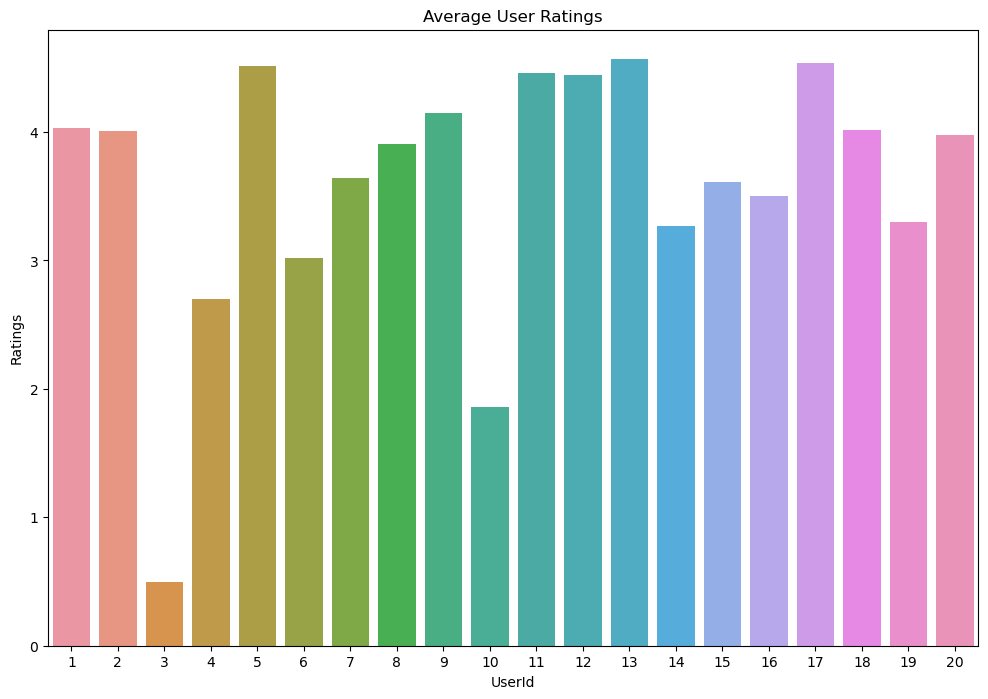

In [82]:
user_ratings = cleaned_df.groupby('userId').agg({
    'rating':'mean'
}).reset_index()


# plot top 20 user ratings
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x= 'userId', y='rating', data = user_ratings[:20])
plt.title('Average User Ratings')
plt.xlabel('UserId')
plt.ylabel('Ratings');

 #### 2.2 Number of ratings per user

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


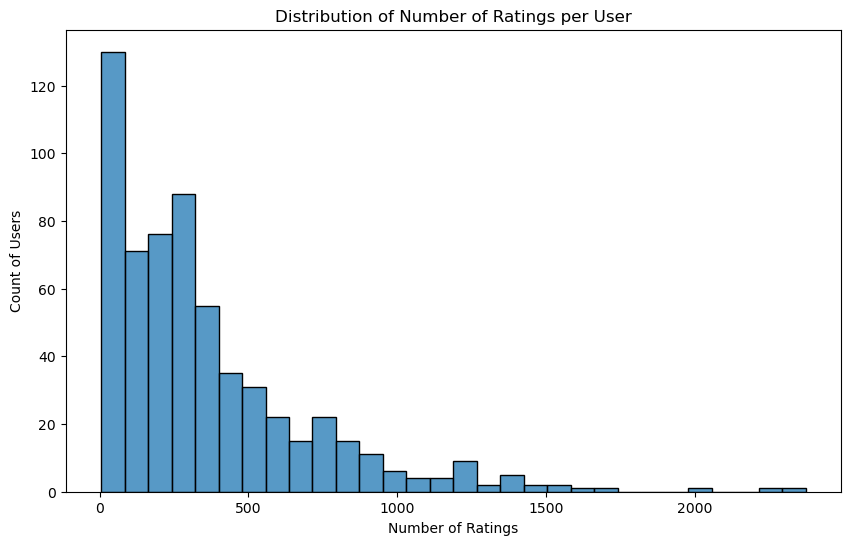

In [83]:
# Number of ratings per user
ratings_per_user = cleaned_df.groupby('userId')['rating'].count().sort_values(ascending=False)

# Plot the distribution of ratings per user
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, kde=False, bins=30)
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Users")
plt.show();

#### 2.3 Number of ratings per movie

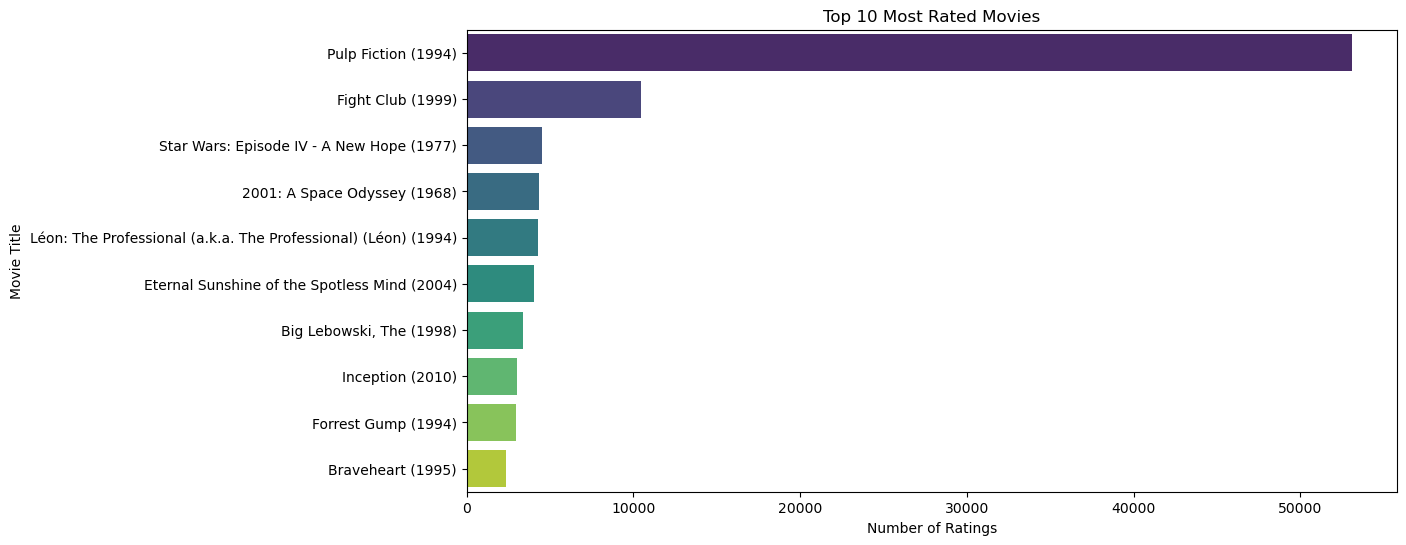

In [84]:
# Number of ratings per movie
ratings_per_movie = cleaned_df.groupby('title')['rating'].count().sort_values(ascending=False)

# Plot the top 10 most rated movies
top_10_movies = ratings_per_movie.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_movies.values, y=top_10_movies.index, palette='viridis')
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show();


**PulpFiction** is the most rated movie

#### 2.4 Highest rated Movies

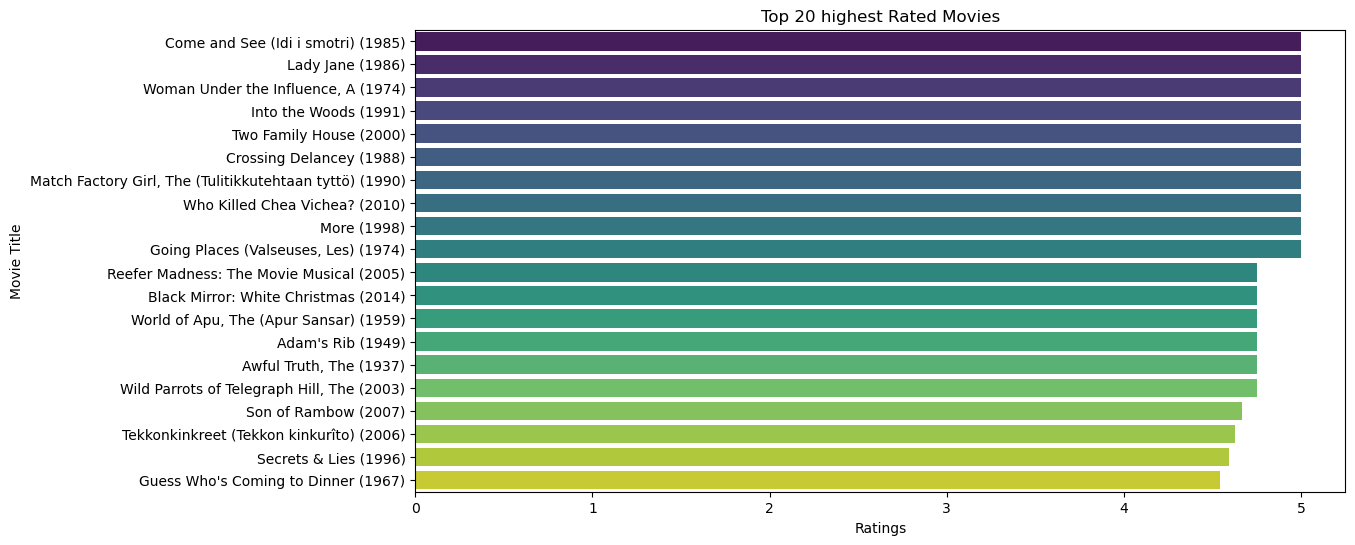

In [85]:
top_rated_movies = cleaned_df.groupby('title')['rating'].mean().sort_values(ascending=False)
top_rated_movies[:20]

# Plot the top 10 most rated movies
top_20_rated_movies = top_rated_movies[:20]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_rated_movies.values, y=top_20_rated_movies.index, palette='viridis')
plt.title("Top 20 highest Rated Movies")
plt.xlabel("Ratings")
plt.ylabel("Movie Title")
plt.show();

#### 2.5 Ratings by Genre

In [86]:
genre = cleaned_df
genre

,userId,movieId,rating,title,genres,tag,genres_list
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun,"[Adventure, Animation, Children, Comedy, Fantasy]"
3,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,"[Adventure, Animation, Children, Comedy, Fantasy]"
5,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun,"[Adventure, Animation, Children, Comedy, Fantasy]"
6,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,"[Adventure, Animation, Children, Comedy, Fantasy]"
...,...,...,...,...,...,...,...
233208,599,176419,3.5,Mother! (2017),Drama|Horror|Mystery|Thriller,uncomfortable,"[Drama, Horror, Mystery, Thriller]"
233209,599,176419,3.5,Mother! (2017),Drama|Horror|Mystery|Thriller,unsettling,"[Drama, Horror, Mystery, Thriller]"
233210,594,7023,4.5,"Wedding Banquet, The (Xi yan) (1993)",Comedy|Drama|Romance,In Netflix queue,"[Comedy, Drama, Romance]"
233211,606,6107,4.0,Night of the Shooting Stars (Notte di San Lore...,Drama|War,World War II,"[Drama, War]"


In [87]:
genre['genres'] = genre['genres'].str.split('|')
genre['genres']

C:\Users\user\AppData\Local\Temp\ipykernel_10444\1163881939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre['genres'] = genre['genres'].str.split('|')


0         [Adventure, Animation, Children, Comedy, Fantasy]
2         [Adventure, Animation, Children, Comedy, Fantasy]
3         [Adventure, Animation, Children, Comedy, Fantasy]
5         [Adventure, Animation, Children, Comedy, Fantasy]
6         [Adventure, Animation, Children, Comedy, Fantasy]
                                ...                        
233208                   [Drama, Horror, Mystery, Thriller]
233209                   [Drama, Horror, Mystery, Thriller]
233210                             [Comedy, Drama, Romance]
233211                                         [Drama, War]
233212                                              [Drama]
Name: genres, Length: 219406, dtype: object

In [88]:
genres_exploded = genre.explode('genres')
genres_exploded

,userId,movieId,rating,title,genres,tag,genres_list
0,1,1,4.0,Toy Story (1995),Adventure,pixar,"[Adventure, Animation, Children, Comedy, Fantasy]"
0,1,1,4.0,Toy Story (1995),Animation,pixar,"[Adventure, Animation, Children, Comedy, Fantasy]"
0,1,1,4.0,Toy Story (1995),Children,pixar,"[Adventure, Animation, Children, Comedy, Fantasy]"
0,1,1,4.0,Toy Story (1995),Comedy,pixar,"[Adventure, Animation, Children, Comedy, Fantasy]"
0,1,1,4.0,Toy Story (1995),Fantasy,pixar,"[Adventure, Animation, Children, Comedy, Fantasy]"
...,...,...,...,...,...,...,...
233210,594,7023,4.5,"Wedding Banquet, The (Xi yan) (1993)",Drama,In Netflix queue,"[Comedy, Drama, Romance]"
233210,594,7023,4.5,"Wedding Banquet, The (Xi yan) (1993)",Romance,In Netflix queue,"[Comedy, Drama, Romance]"
233211,606,6107,4.0,Night of the Shooting Stars (Notte di San Lore...,Drama,World War II,"[Drama, War]"
233211,606,6107,4.0,Night of the Shooting Stars (Notte di San Lore...,War,World War II,"[Drama, War]"


In [89]:
genres_exploded['genres'].value_counts()

genres
Drama                 140304
Thriller              108884
Crime                  97434
Comedy                 93287
Action                 63587
Sci-Fi                 46104
Adventure              44273
Romance                24705
Mystery                21108
Fantasy                15801
War                    11446
IMAX                   11112
Children               10932
Animation               9910
Horror                  9753
Musical                 4324
Western                 2283
Film-Noir                783
Documentary              711
(no genres listed)         3
Name: count, dtype: int64

In [90]:
# Average rating per genre
avg_rating_per_genre = genres_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)
avg_rating_per_genre

genres
(no genres listed)    4.500000
Crime                 4.122360
War                   4.090294
Thriller              4.072646
Drama                 4.050754
Film-Noir             4.026181
Comedy                3.989425
Action                3.938415
Mystery               3.912498
Western               3.911520
Sci-Fi                3.882299
Adventure             3.865844
Animation             3.858930
Documentary           3.848805
IMAX                  3.843503
Horror                3.833231
Romance               3.794961
Musical               3.738552
Fantasy               3.733751
Children              3.702570
Name: rating, dtype: float64

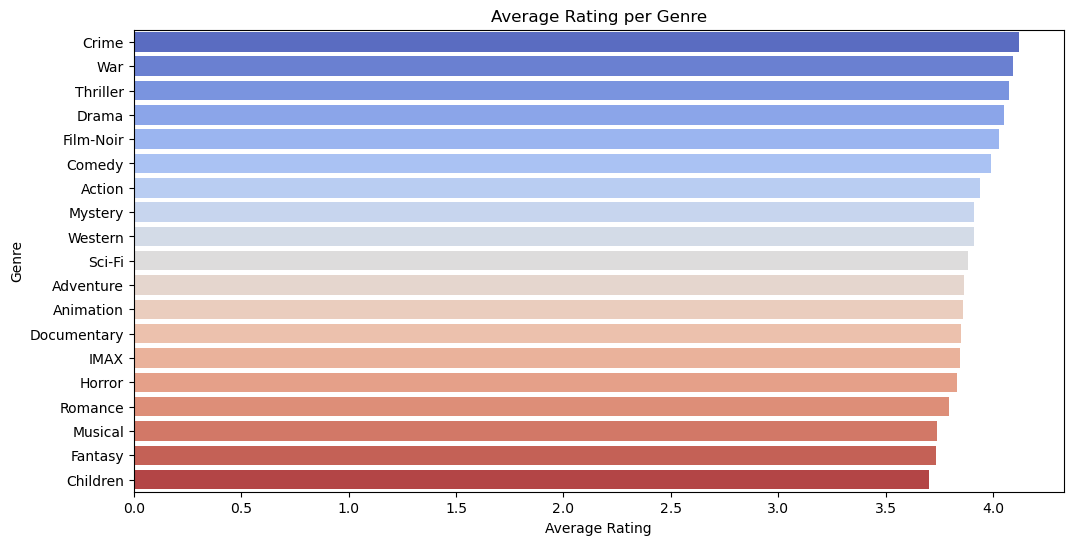

In [91]:
# Plot the average rating per genre
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_per_genre.values[1:], y=avg_rating_per_genre.index[1:], palette='coolwarm')
plt.title("Average Rating per Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

**Crime**  |  **War** | **Thriller** | **Drama** | **Film-Noir**  - are the top rated genres, with an average of **4.0+**     

## 3.Multivariate Analysis

We will create a heatmap showing the relationship between genre and rating from the top 20 user Ids.

In [93]:
top_20_users=cleaned_df['userId'].value_counts().head(20).index

df_top_20_users= cleaned_df[cleaned_df['userId'].isin(top_20_users)]

genres=df_top_20_users['genres'].str.split('|',expand=True)

df_genres= pd.concat([df_top_20_users[['userId','rating']],genres], axis=1)

df_genres_melted= pd.melt(df_genres, id_vars=['userId', 'rating'])
df_genres_melted.columns=['userId', 'rating', 'genre_num', 'genre']

average_rating_per_genre = df_genres_melted.groupby(['userId', 'genre'])['rating'].mean().unstack()

In [96]:

plt.figure(figsize=(12,10))
sns.heatmap(average_rating_per_genre,cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Average Rating per Genre(Top 20 Users)")
plt.xlabel('Genre')
plt.ylabel('UserId')
plt.show();

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x1000 with 0 Axes>

## MODELLING